In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Initialize the x- and y-arrays that we will use to plot
x_axis = []
mean = []
variance = []
skew_list = []
kurt_list = []

# generate gaussian pdf of x
mu = 2.0
variance = 2.0
sigma = math.sqrt(variance)
#x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
#plot(x, stats.norm.pdf(x, mu, sigma))
#show()

In [3]:
# proposal
def q(x):
    # add a random number drawn from a gaussian whose mean is the current position and the standard deviation is 1
    # randn() draws from a normalized gausian whose mean is 0 and stdev is 1
    return x + randn()

In [4]:
# density function f(x)
# returns 1 for all values of x
def f(x):
    return 1.0

In [8]:
xs = [3]    # initialize MCMC algorithm with arbitrary starting value of x
for i in range(20000):
    x = xs[-1]
    x_new = q(x)
    accept_ratio = f(x_new)/f(x) # acceptance ratio is 1 so it always accepts to take a step. It's a random walk!
    if rand() < accept_ratio:
        xs.append(x_new)
    else:
        xs.append(x)

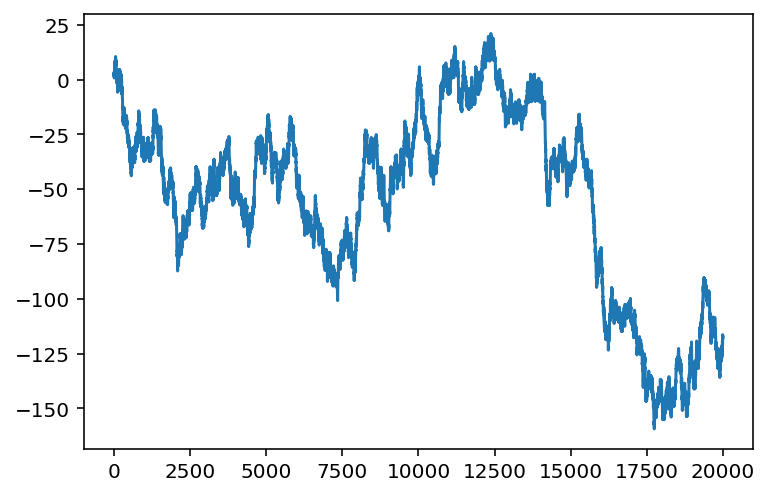

In [9]:
plot(xs)

The value of $x$ appears to run away over time! Namely, it favors a certain direction (either positive or negative) on long timescales.

(array([0.00188535, 0.00396262, 0.00705595, 0.00242725, 0.00442549,
        0.00552058, 0.00922354, 0.00514802, 0.00578023, 0.00650276,
        0.00651405, 0.01030733, 0.00337557, 0.00772203, 0.01401029,
        0.00759785, 0.00387231, 0.00351104, 0.00240467, 0.00165956]),
 array([-93.21499727, -84.35811064, -75.50122401, -66.64433738,
        -57.78745076, -48.93056413, -40.0736775 , -31.21679087,
        -22.35990425, -13.50301762,  -4.64613099,   4.21075564,
         13.06764226,  21.92452889,  30.78141552,  39.63830215,
         48.49518878,  57.3520754 ,  66.20896203,  75.06584866,
         83.92273529]),
 <a list of 20 Patch objects>)

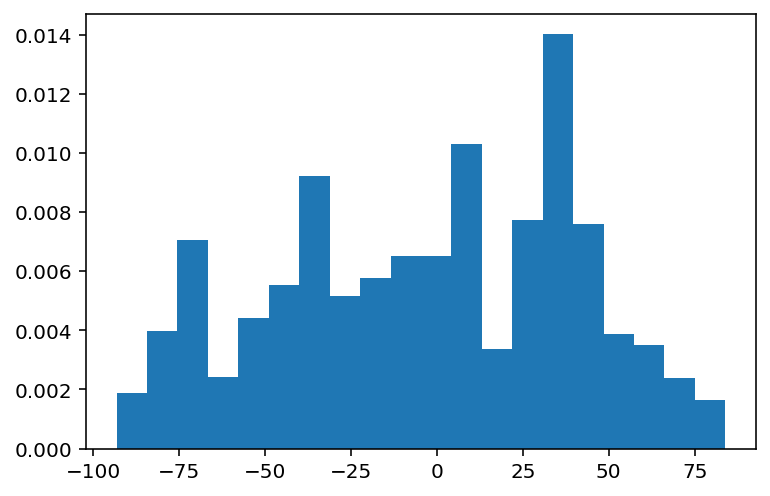

In [7]:
hist(xs, density=True, bins=20)

This results in a histogram of x-values that is skewed to one side and therefore does not approximate the original density function.